In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart = pd.read_csv('C:/Users/rudra/Downloads/Data Science/2nd semester/vs_code/data/heart_attack_analysis_dataset/heart.csv')
df_o2Saturation = pd.read_csv('C:/Users/rudra/Downloads/Data Science/2nd semester/vs_code/data/heart_attack_analysis_dataset/o2Saturation.csv')

# Details of the dataset

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
	
thalach : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels(0-3)

thall: Thalium Stress Test result ~ (0,3)

output: Target variable

target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
df_heart.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
df_o2Saturation.head()

98.6
0  98.6
1  98.6
2  98.6
3  98.1
4  97.5

In [5]:
df_heart.shape

(303, 14)

In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Finding null and duplicate values

In [7]:
df_heart.isnull()

age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False  False  False   False  

[303 rows x 14 columns]

In [8]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df_heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [10]:
df_heart.duplicated().sum()

np.int64(1)

In [11]:
df_heart[df_heart.duplicated()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [12]:
df_heart['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [13]:
#Remove duplicates

df_heart.drop_duplicates(keep='first', inplace=True)

In [14]:
df_heart.shape

(302, 14)

In [15]:
df_heart.describe()

age         sex          cp      trtbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [16]:
df_heart_correlation = df_heart.corr()

df_heart_correlation

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trtbps    0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalachh -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exng      0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slp      -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
caa       0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thall     0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
output   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trtbps   -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalachh  0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exng     -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slp       0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
caa      -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thall    -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
output    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

             thall    output  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trtbps    0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalachh -0.094910  0.419955  
exng      0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slp      -0.103314  0.343940  
caa       0.160085 -0.408992  
thall     1.000000 -0.343101  
output   -0.343101  1.000000

In [17]:
filtered_df_heart_corr = df_heart_correlation[(df_heart_correlation >= 0.4) | (df_heart_correlation <= -0.4)]

In [18]:
filtered_df_heart_corr

age  sex       cp  trtbps  chol  fbs  restecg  thalachh      exng  \
age       1.0  NaN      NaN     NaN   NaN  NaN      NaN       NaN       NaN   
sex       NaN  1.0      NaN     NaN   NaN  NaN      NaN       NaN       NaN   
cp        NaN  NaN  1.00000     NaN   NaN  NaN      NaN       NaN       NaN   
trtbps    NaN  NaN      NaN     1.0   NaN  NaN      NaN       NaN       NaN   
chol      NaN  NaN      NaN     NaN   1.0  NaN      NaN       NaN       NaN   
fbs       NaN  NaN      NaN     NaN   NaN  1.0      NaN       NaN       NaN   
restecg   NaN  NaN      NaN     NaN   NaN  NaN      1.0       NaN       NaN   
thalachh  NaN  NaN      NaN     NaN   NaN  NaN      NaN  1.000000       NaN   
exng      NaN  NaN      NaN     NaN   NaN  NaN      NaN       NaN  1.000000   
oldpeak   NaN  NaN      NaN     NaN   NaN  NaN      NaN       NaN       NaN   
slp       NaN  NaN      NaN     NaN   NaN  NaN      NaN       NaN       NaN   
caa       NaN  NaN      NaN     NaN   NaN  NaN      NaN       NaN       NaN   
thall     NaN  NaN      NaN     NaN   NaN  NaN      NaN       NaN       NaN   
output    NaN  NaN  0.43208     NaN   NaN  NaN      NaN  0.419955 -0.435601   

           oldpeak       slp       caa  thall    output  
age            NaN       NaN       NaN    NaN       NaN  
sex            NaN       NaN       NaN    NaN       NaN  
cp             NaN       NaN       NaN    NaN  0.432080  
trtbps         NaN       NaN       NaN    NaN       NaN  
chol           NaN       NaN       NaN    NaN       NaN  
fbs            NaN       NaN       NaN    NaN       NaN  
restecg        NaN       NaN       NaN    NaN       NaN  
thalachh       NaN       NaN       NaN    NaN  0.419955  
exng           NaN       NaN       NaN    NaN -0.435601  
oldpeak   1.000000 -0.576314       NaN    NaN -0.429146  
slp      -0.576314  1.000000       NaN    NaN       NaN  
caa            NaN       NaN  1.000000    NaN -0.408992  
thall          NaN       NaN       NaN    1.0       NaN  
output   -0.429146       NaN -0.408992    NaN  1.000000

# Data Visualization

## Univariate analysis

In [19]:
df_heart

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

### Breakdown for Age

In [20]:
df_heart['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

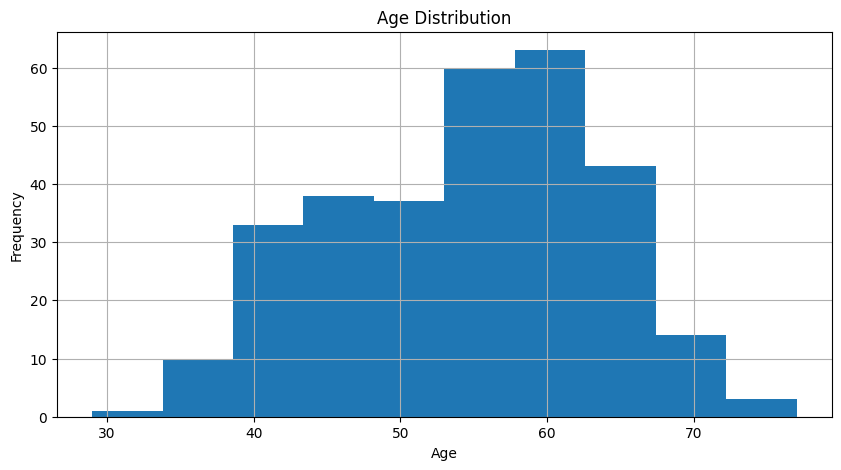

In [21]:
#used histogram to see the distribution of age wwith bin size of 10
df_heart.age.hist(bins=10, figsize=(10,5))

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

<Figure size 1000x1000 with 0 Axes>

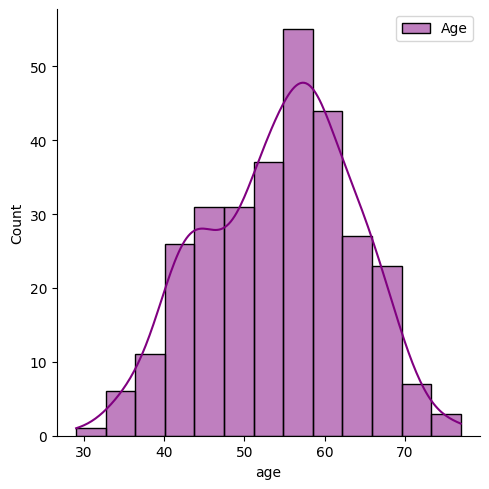

In [22]:
plt.figure(figsize=(10,10))
sns.displot(df_heart.age, color="purple", label="Age", kde= True)
plt.legend()

### Break down for Sex

In [23]:
df_heart['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

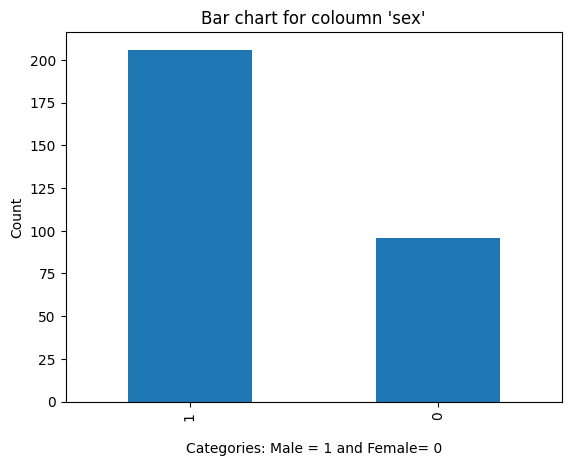

In [24]:
df_heart['sex'].value_counts().plot(kind = 'bar')
plt.title("Bar chart for coloumn 'sex'")
plt.xlabel("\nCategories: Male = 1 and Female= 0")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

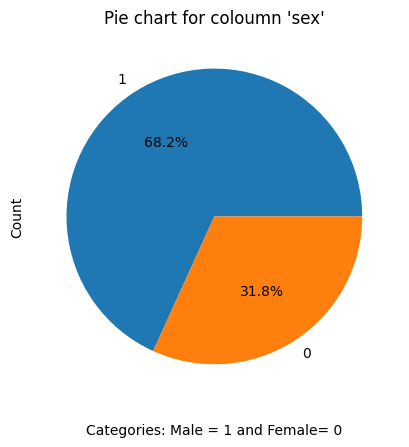

In [25]:
df_heart['sex'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title("Pie chart for coloumn 'sex'")
plt.xlabel("\nCategories: Male = 1 and Female= 0")
plt.ylabel("Count")

Number of people having Sex as 1 is more than twice of people having sex as 0.

### Breakdown for Chest pain (cp)

In [26]:
df_heart['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

used bar plot, pie plot and countplot from seaborn

Text(0, 0.5, 'Count')

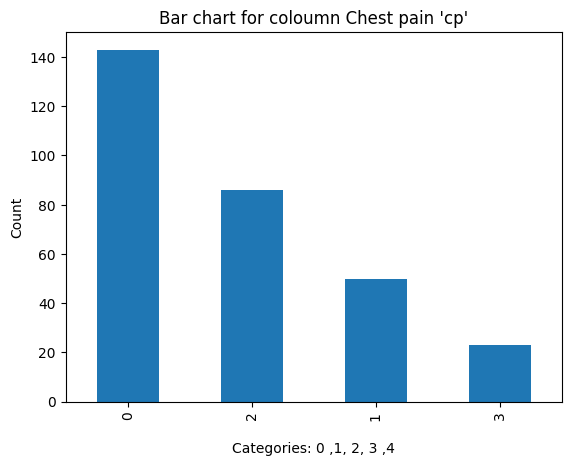

In [27]:
df_heart['cp'].value_counts().plot(kind = 'bar')
plt.title("Bar chart for coloumn Chest pain 'cp'")
plt.xlabel("\nCategories: 0 ,1, 2, 3 ,4")
plt.ylabel("Count")

In [28]:
df_heart['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

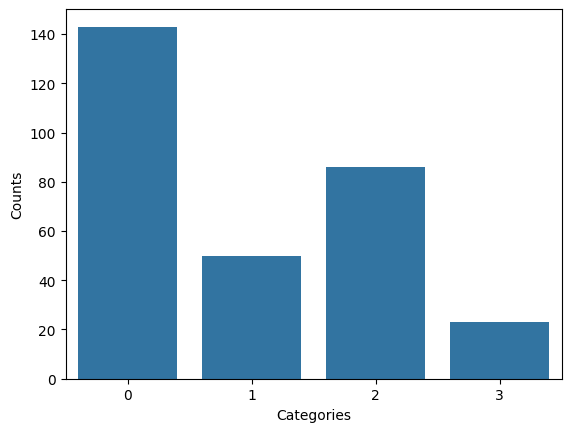

In [29]:
sns.countplot(data = df_heart, x = 'cp')
plt.xlabel('Categories')
plt.ylabel('Counts')

Text(0, 0.5, 'Count')

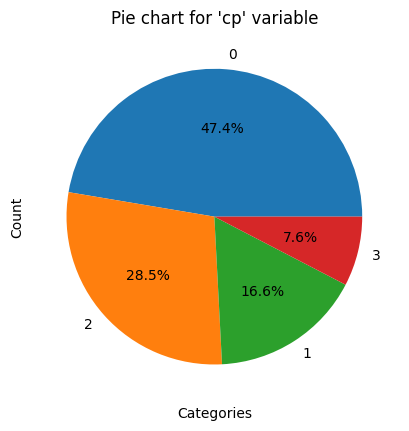

In [30]:
df_heart['cp'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie chart for 'cp' variable")
plt.xlabel("Categories")
plt.ylabel("Count")

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.

It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest

### Break down for trtbs  (trtbps : resting blood pressure (in mm Hg))

In [31]:
df_heart['trtbps'].value_counts()

trtbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
145     5
152     5
134     5
170     4
100     4
122     4
105     3
180     3
136     3
142     3
126     3
115     3
148     2
146     2
144     2
178     2
94      2
102     2
104     1
155     1
172     1
101     1
129     1
156     1
117     1
106     1
200     1
165     1
174     1
192     1
123     1
154     1
114     1
164     1
Name: count, dtype: int64

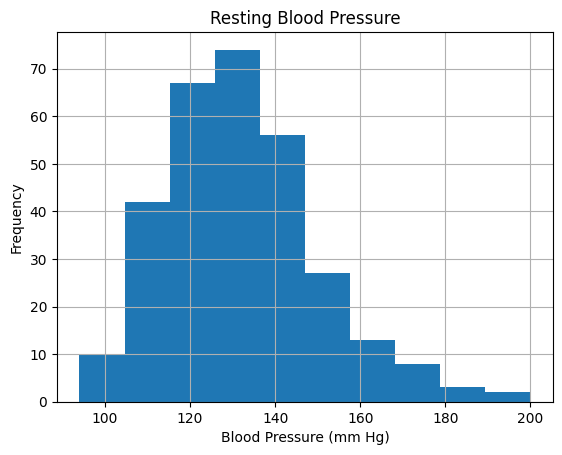

In [32]:
df_heart['trtbps'].hist(bins = 10)
plt.title('Resting Blood Pressure')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

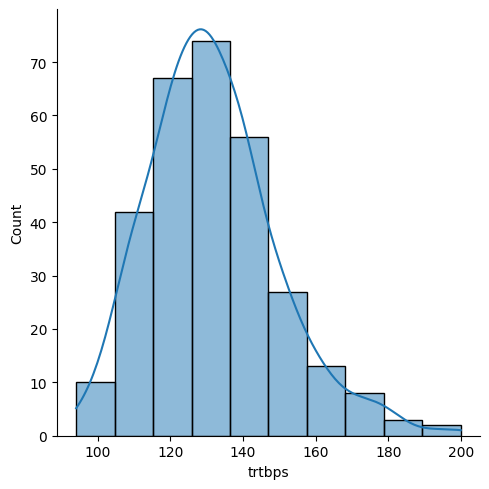

In [33]:
sns.displot(df_heart.trtbps, bins = 10 ,  label="Resting Blood Pressure", kde= True)

### Breakdown of chol(cholestoral)
cholestoral in mg/dl fetched via BMI sensor

In [34]:
df_heart['chol'].value_counts()

chol
204    6
234    6
197    6
212    5
269    5
      ..
169    1
187    1
176    1
241    1
131    1
Name: count, Length: 152, dtype: int64

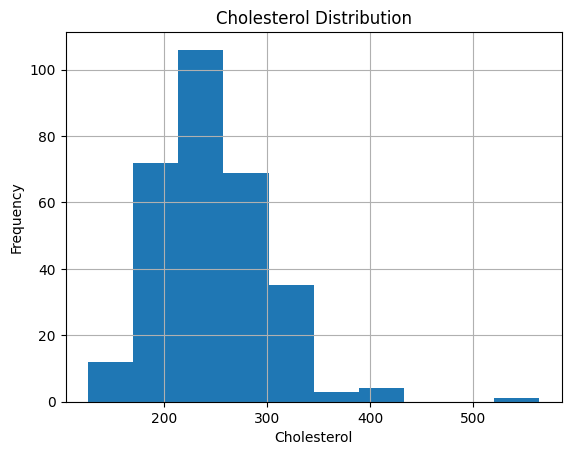

In [35]:
df_heart['chol'].hist(bins = 10)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

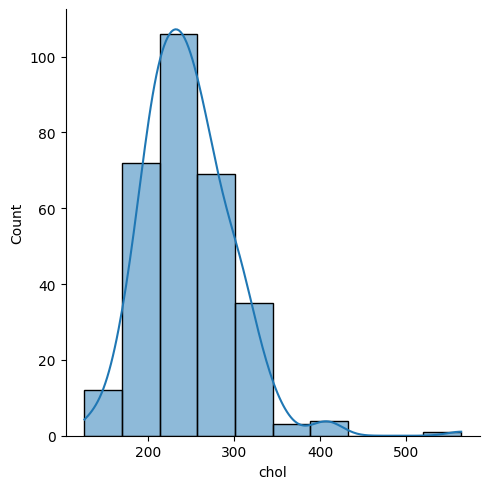

In [36]:
sns.displot(df_heart.chol, bins = 10 ,  label="Cholesterol", kde= True)

### Breakdown of fbs((fasting blood sugar)
fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))

In [37]:
df_heart['fbs'].value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

<Axes: xlabel='fbs', ylabel='count'>

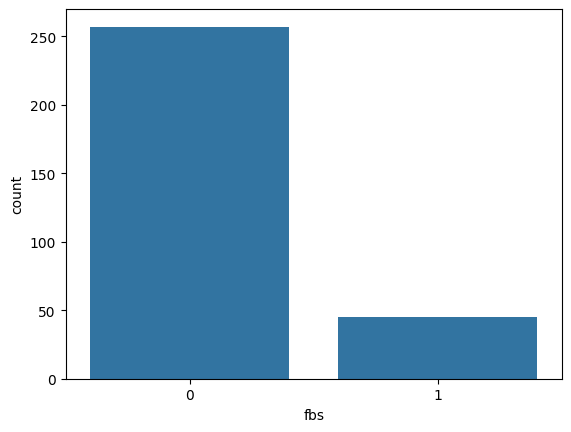

In [38]:
sns.countplot(data = df_heart, x = 'fbs')

<Axes: ylabel='count'>

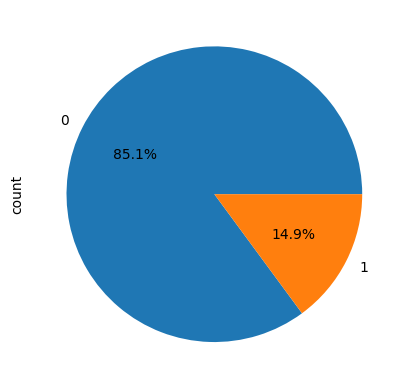

In [39]:
df_heart['fbs'].value_counts().plot(kind='pie', autopct='%1.1f%%')

FBS with value 0 is significantly higher than value 1.

### Breakdown of restecg(resting electrocardiographic results)

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [40]:
df_heart['restecg'].value_counts()

restecg
1    151
0    147
2      4
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

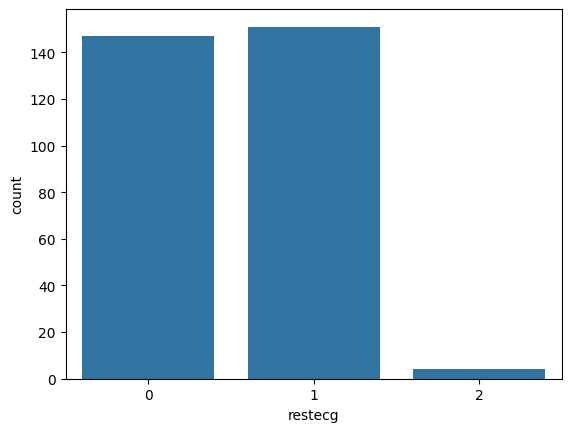

In [41]:
sns.countplot(data = df_heart, x = 'restecg')

<Axes: ylabel='count'>

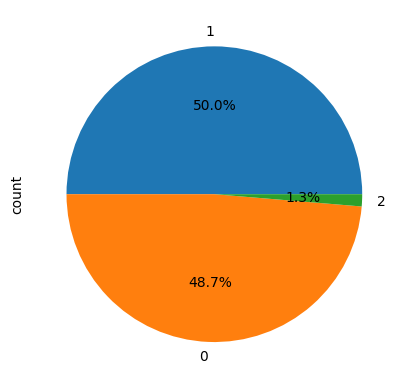

In [42]:
df_heart['restecg'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.

### Breakdown of thalach (thalach : maximum heart rate achieved)

Text(0, 0.5, 'Frequency')

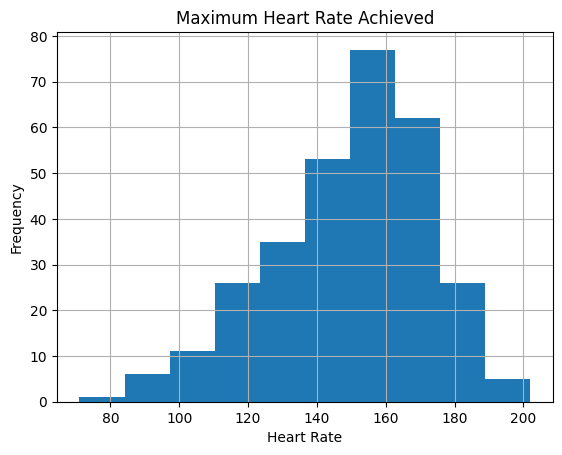

In [43]:
df_heart['thalachh'].hist(bins = 10)
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

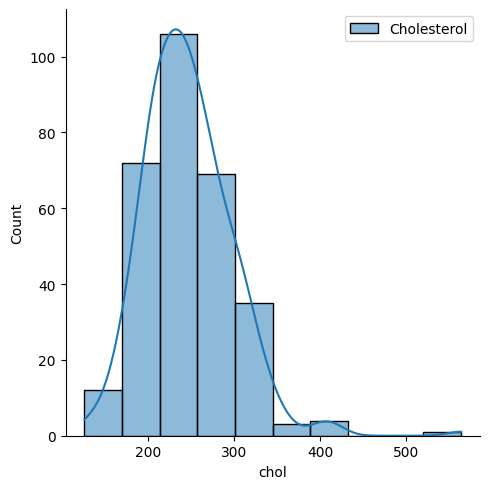

In [44]:
sns.displot(df_heart.chol, bins = 10 ,  label="Cholesterol", kde= True)
plt.legend()

### Breakdown of exng (exercise induced angina (1 = yes; 0 = no))

In [45]:
df_heart['exng'].value_counts()

exng
0    203
1     99
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

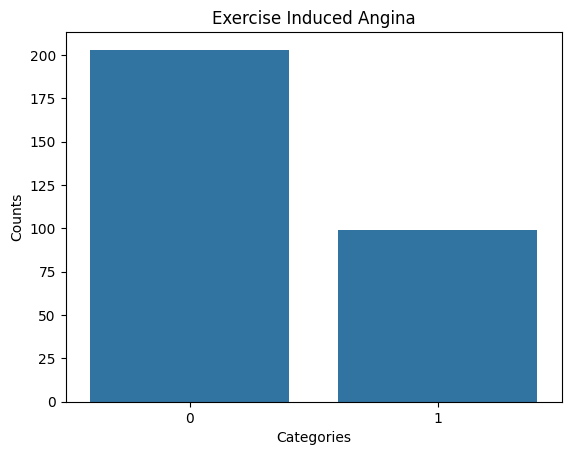

In [46]:
sns.countplot(data = df_heart, x = 'exng')
plt.title('Exercise Induced Angina')
plt.xlabel('Categories')
plt.ylabel('Counts')

<Axes: ylabel='count'>

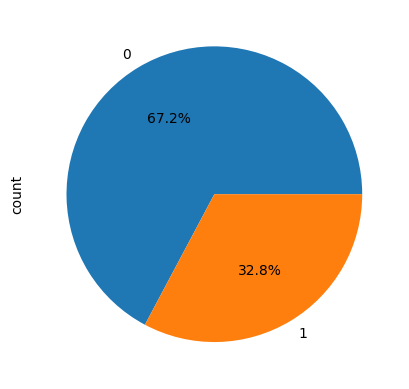

In [47]:
df_heart['exng'].value_counts().plot(kind='pie', autopct='%1.1f%%')

(exercise induced angina (1 = yes; 0 = no))

exng count:
yes count more than twice of no

### Breakdown for oldpeak(Previous peak)

In [48]:
df_heart['oldpeak'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 302, dtype: float64>

<Axes: >

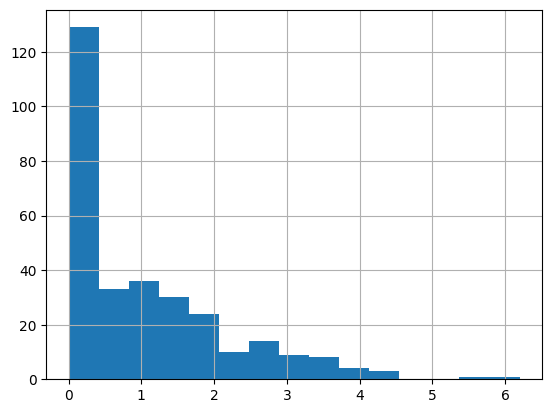

In [49]:
df_heart['oldpeak'].hist(bins = 15)

C:\Users\rudra\AppData\Local\Temp\ipykernel_29720\1446845716.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_heart.oldpeak, bins = 10, kde = True)


<Axes: xlabel='oldpeak', ylabel='Density'>

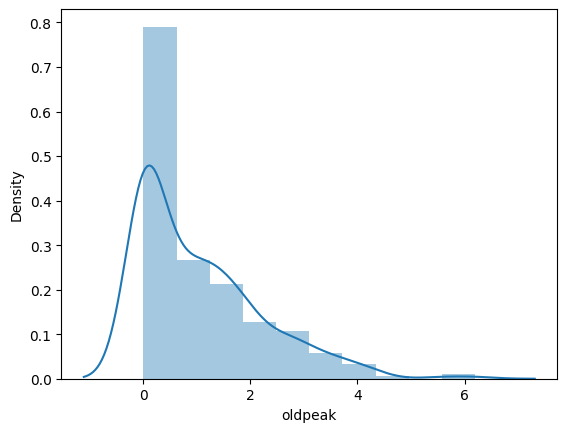

In [50]:
sns.distplot(df_heart.oldpeak, bins = 10, kde = True)

Did not understand this. Need to dif further


### Breakdown for slp(slope)

In [51]:
df_heart['slp'].value_counts()

slp
2    141
1    140
0     21
Name: count, dtype: int64

<Axes: xlabel='slp', ylabel='count'>

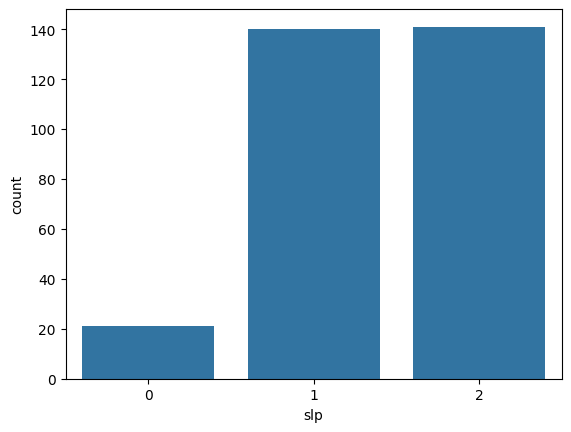

In [52]:
sns.countplot(data = df_heart, x = 'slp')

<Axes: ylabel='count'>

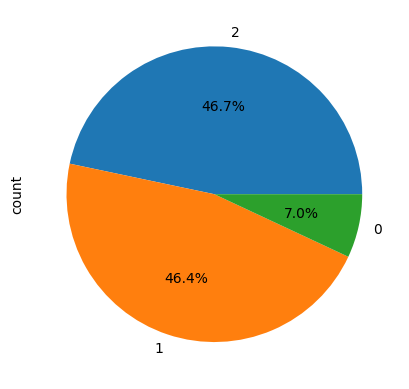

In [53]:
df_heart['slp'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Not sure what is slp re-presenting

### Breakdown for caa(Number of major vessels(0-3))

In [54]:
df_heart['caa'].value_counts()

caa
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

<Axes: xlabel='caa', ylabel='count'>

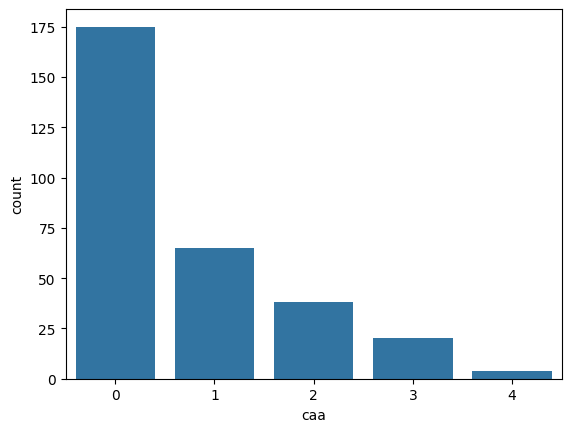

In [55]:
sns.countplot(data = df_heart, x = 'caa')

<Axes: ylabel='count'>

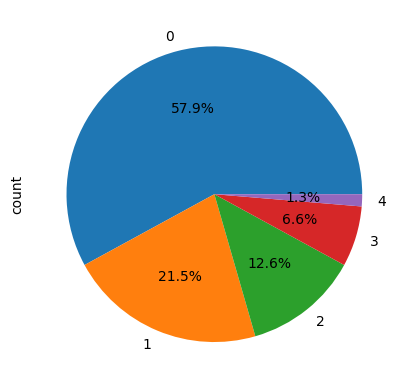

In [56]:
df_heart['caa'].value_counts().plot(kind='pie', autopct='%1.1f%%')

The majority of individuals have 0 major vessels (57.9%), followed by those with 1 (21.5%) and 2 (12.6%), while very few have 3 or 4 major vessels.

### Breakdown for thall (Thalium Stress Test result ~ (0,3))

In [57]:
df_heart['thall'].value_counts()

thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64

<Axes: xlabel='thall', ylabel='count'>

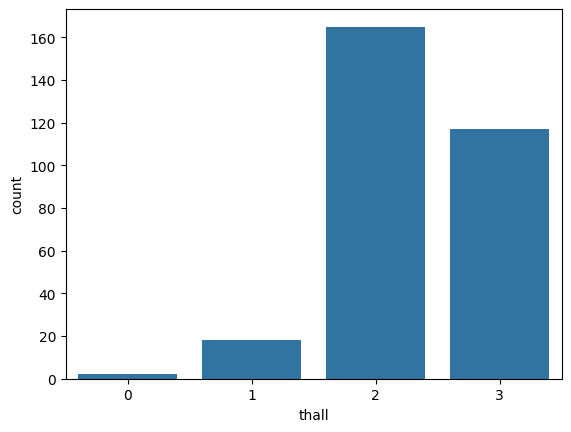

In [58]:
sns.countplot(data = df_heart, x = 'thall')

<Axes: ylabel='count'>

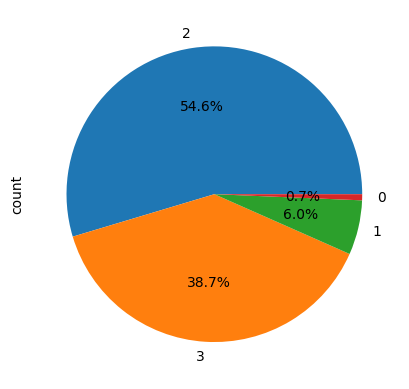

In [59]:
df_heart['thall'].value_counts().plot(kind='pie', autopct='%1.1f%%')    

The most common result is "2," accounting for 54.6% of the cases, followed by "3" with 38.7%. The "1" result appears in 6.0% of cases, while the "0" result (an abnormal condition) is very rare, representing only 0.7%.

In the context of the Thalium Stress Test ("thall" variable), the values typically represent the following conditions:

0: No information or abnormal result (can indicate an abnormal outcome or data error).

1: Fixed defect (blood flow is reduced or blocked, often due to scar tissue from a previous heart attack).

2: Normal flow (no major defects in blood flow).

3: Reversible defect (blood flow is reduced during exercise or stress, but normal at rest; often indicates ischemia or coronary artery disease).

These values help assess the blood flow to the heart both during rest and under stress, and are used to identify potential heart conditions like ischemia or other abnormalities.

### Breakdown of output

In [60]:
df_heart['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

<Axes: ylabel='count'>

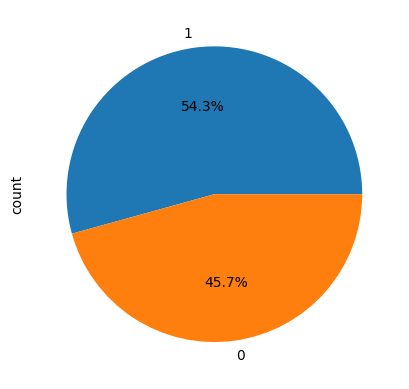

In [61]:
df_heart['output'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Multivariate analysis

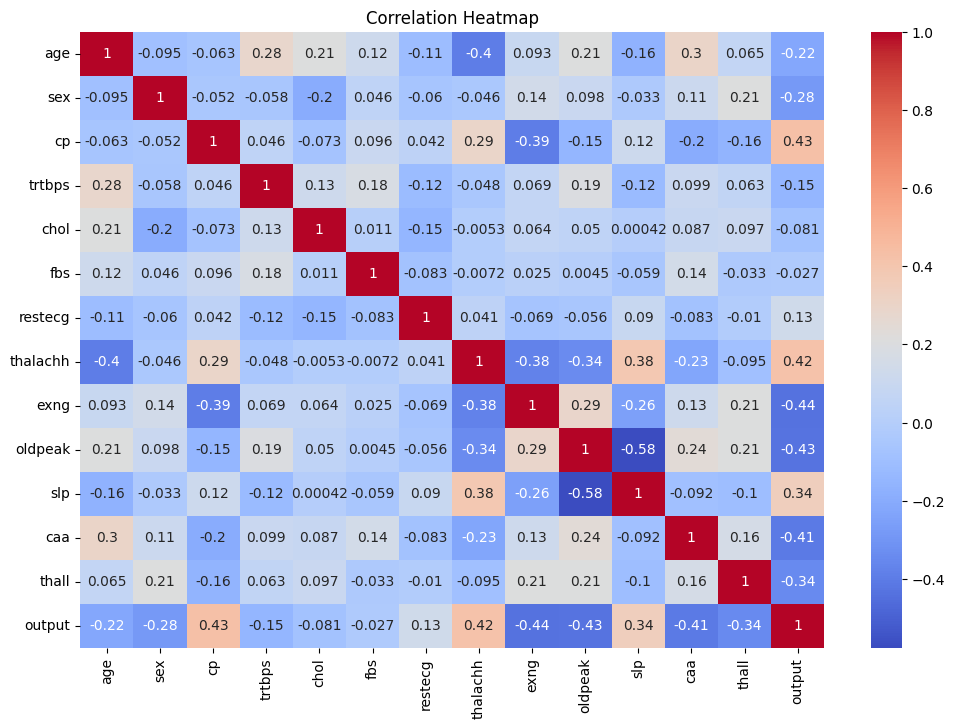

In [62]:
# finding the correlation using sns heat map

plt.figure(figsize=(12, 8))
sns.heatmap(df_heart.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


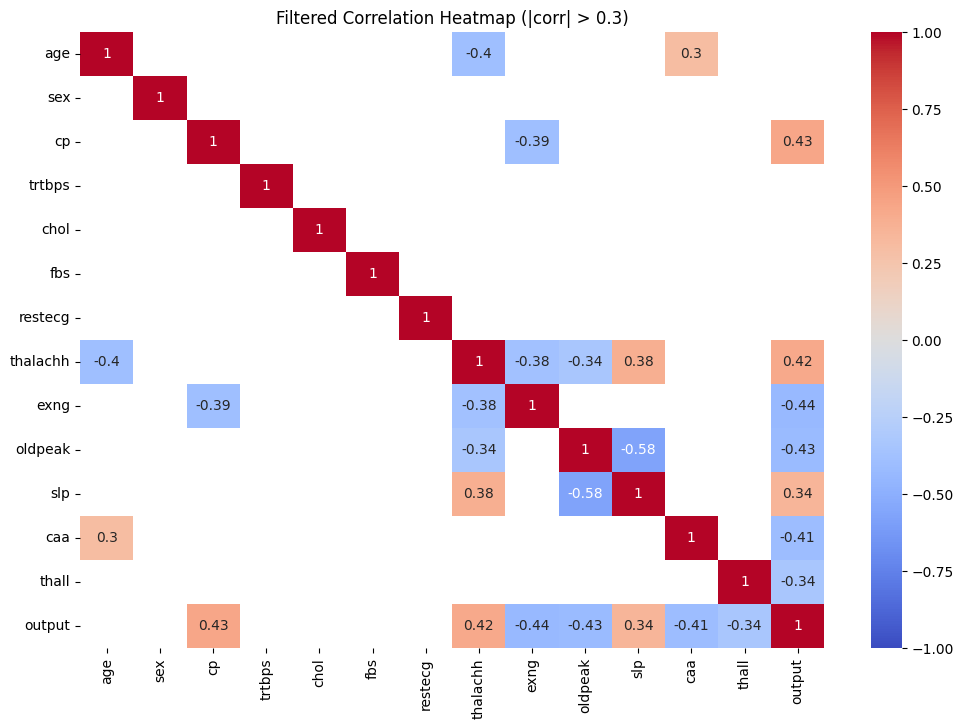

In [63]:
# Calculate the correlation matrix
corr_matrix = df_heart.corr()

# Mask the correlations that are between -0.3 and 0.3 (inclusive)
mask = (corr_matrix > 0.3) | (corr_matrix < -0.3)

# Apply the mask to the correlation matrix
filtered_corr_matrix = corr_matrix.where(mask)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=~mask)
plt.title('Filtered Correlation Heatmap (|corr| > 0.3)')
plt.show()


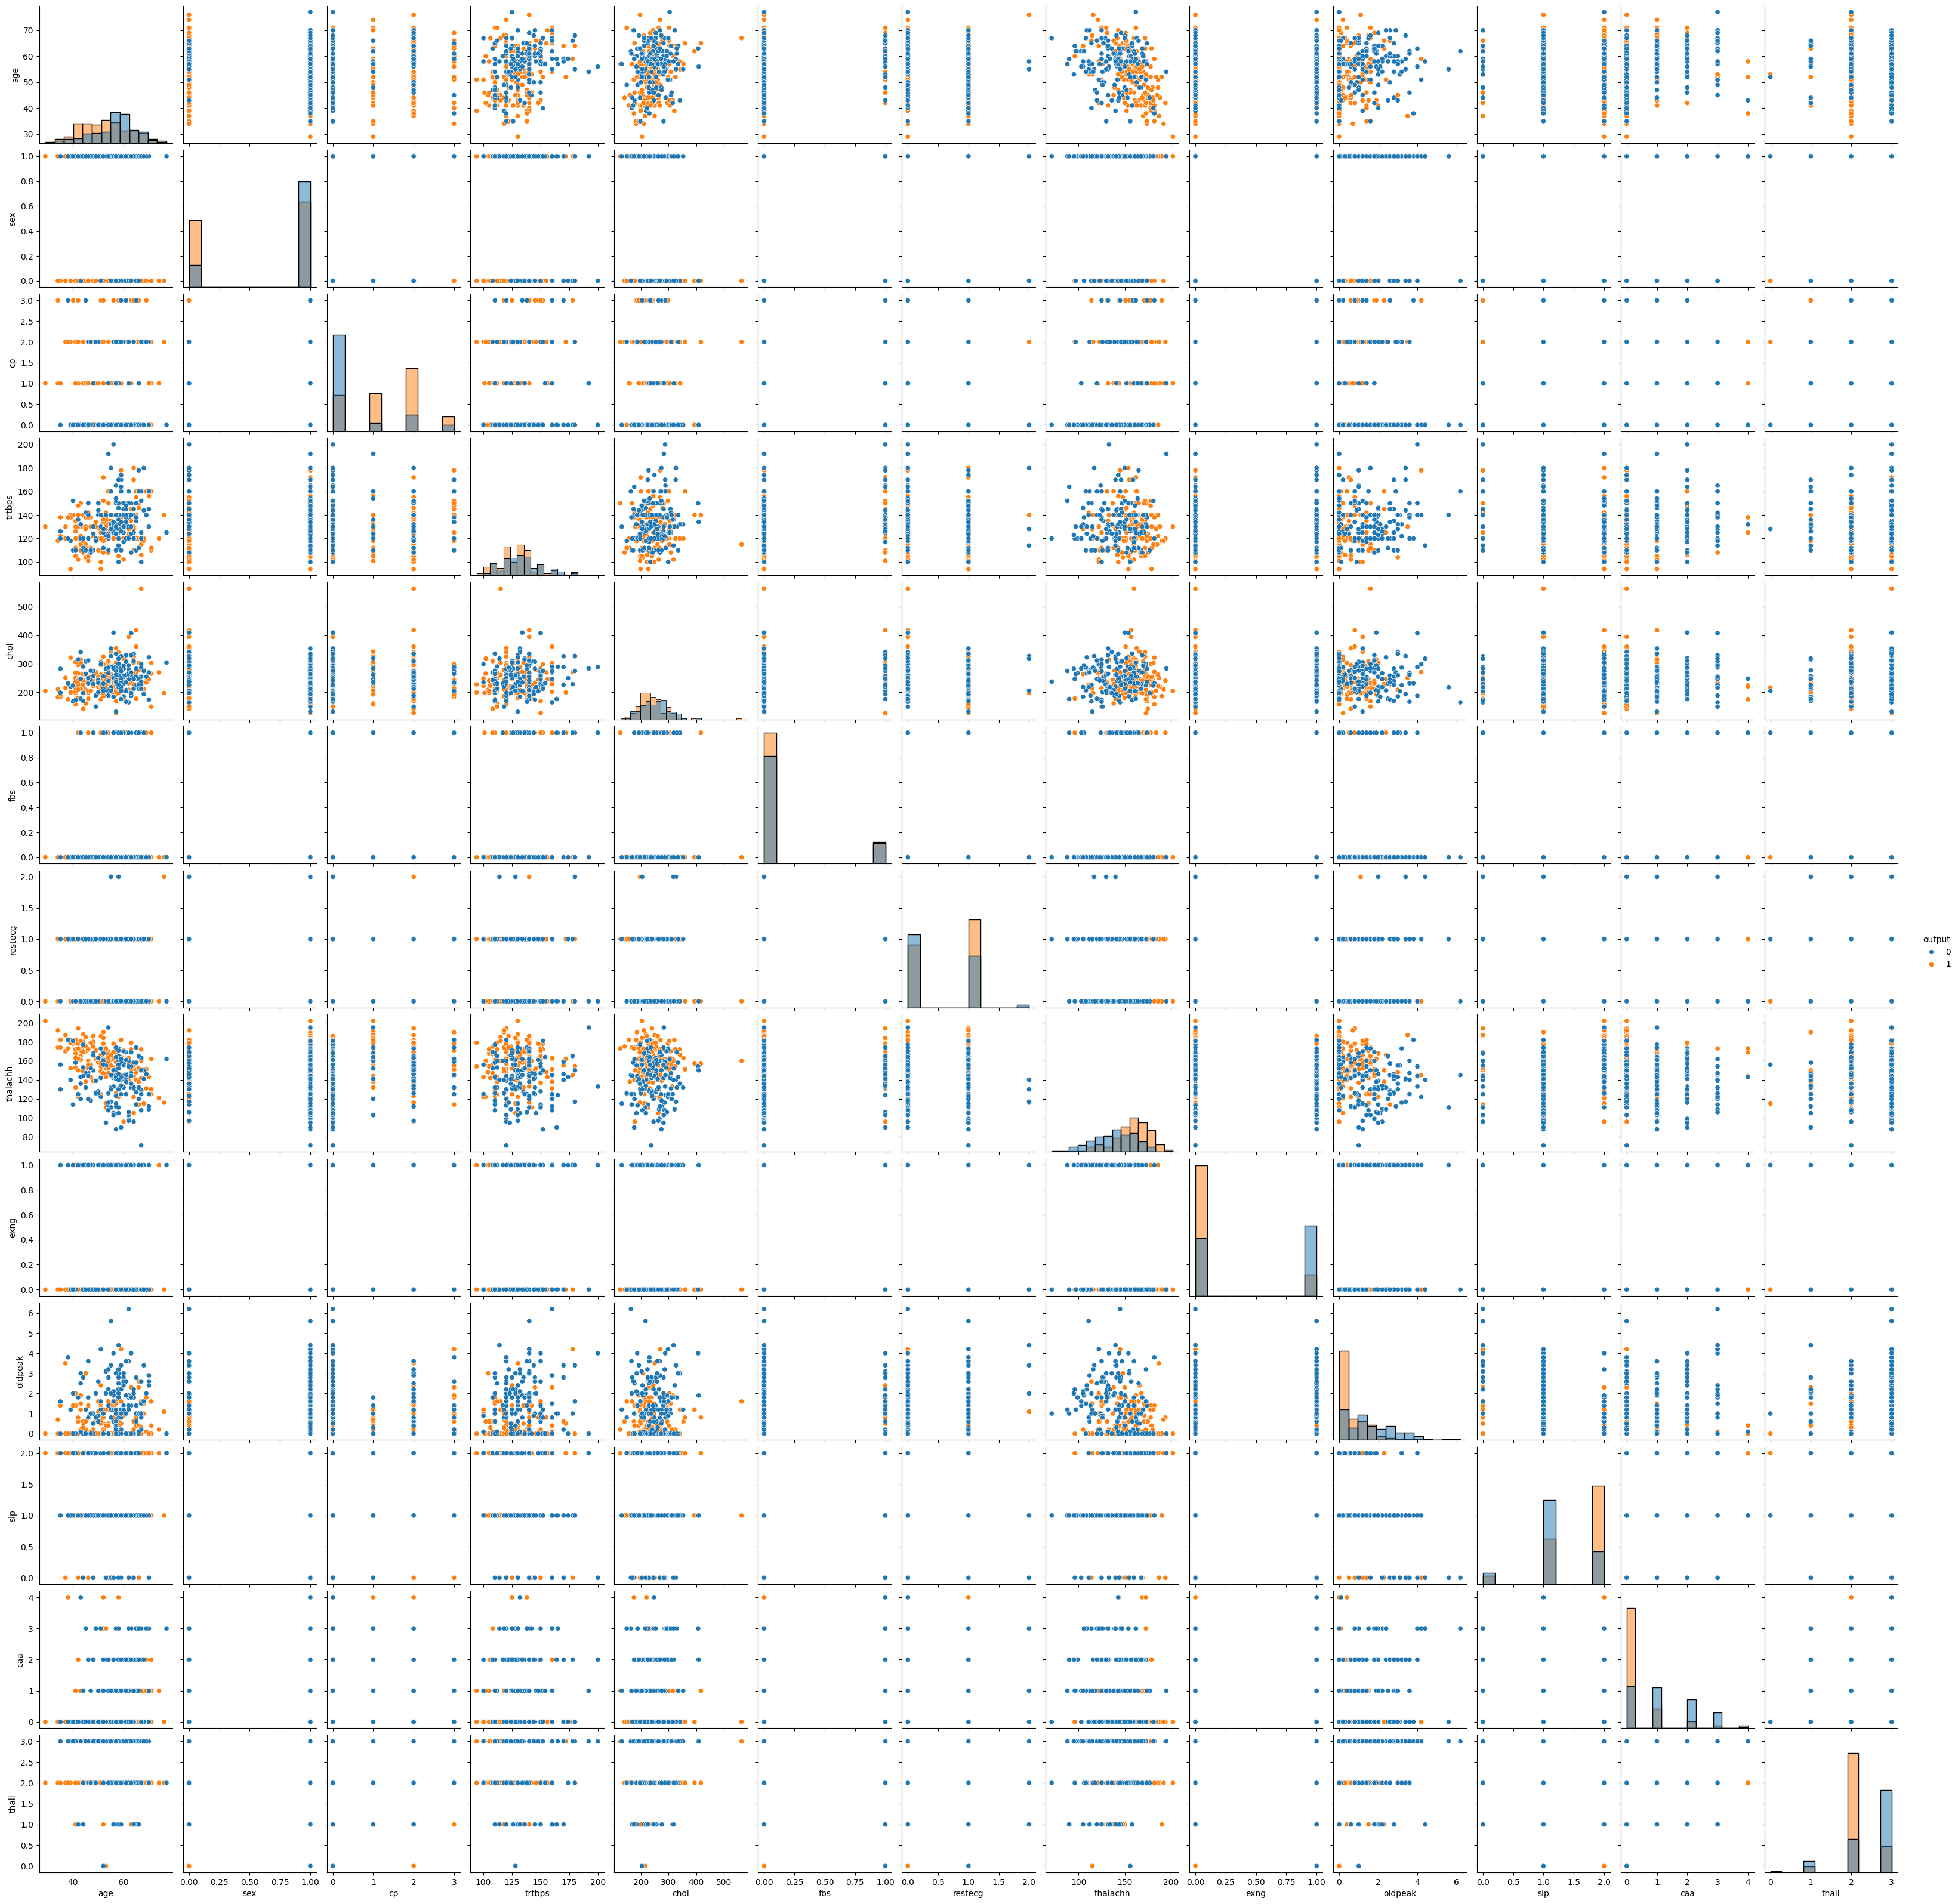

In [64]:
#use of pairplot

sns.pairplot(df_heart, hue='output', diag_kind='hist')

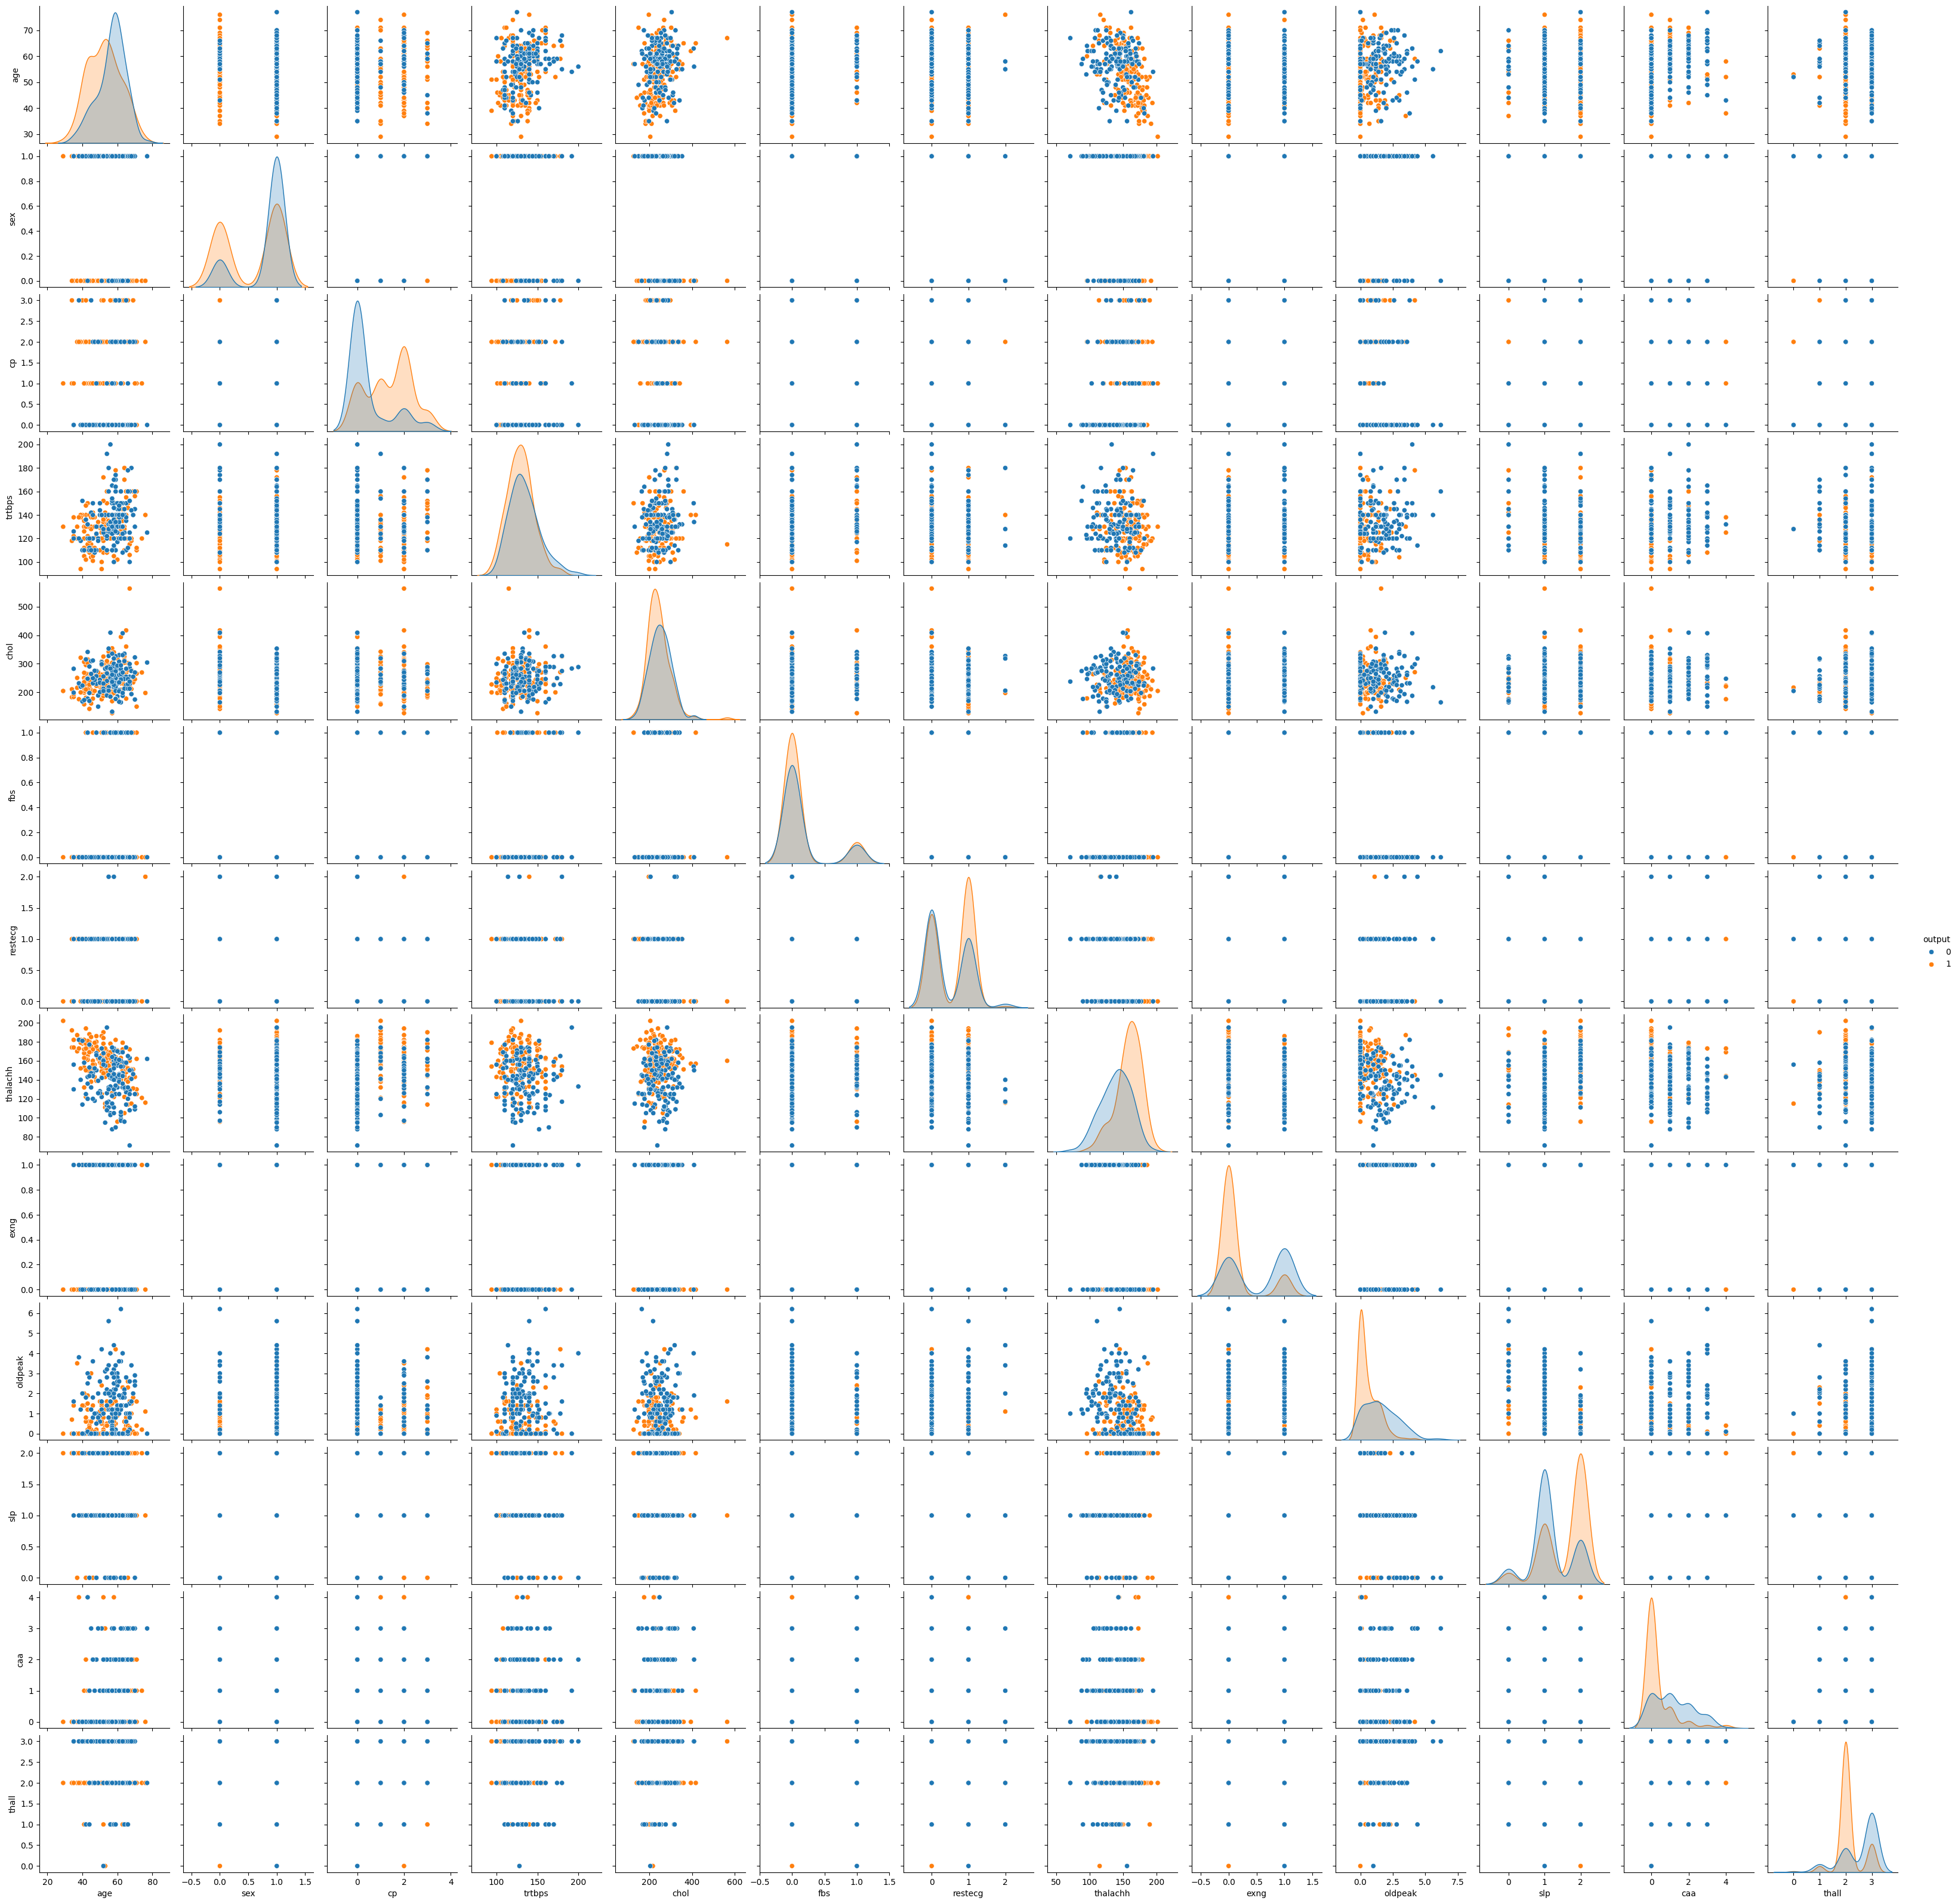

In [65]:
#use of pairplot

sns.pairplot(df_heart, hue='output', diag_kind='kde')

### Heart attack(output) vs Age

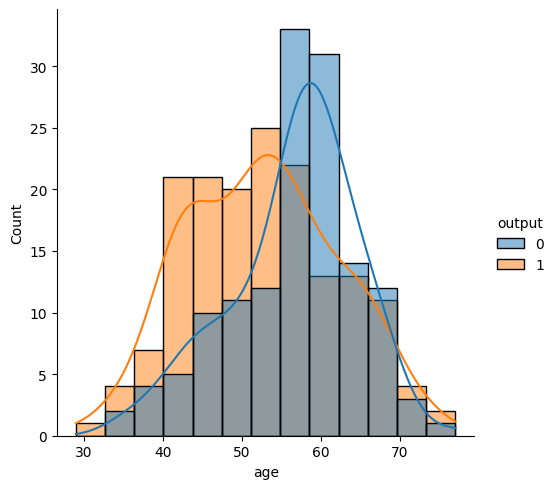

In [66]:
sns.displot(df_heart, x="age", hue="output", kde=True)

target :
 
 0= less chance of heart attack = No heart attack
 
 1= more chance of heart attack = Heart attack

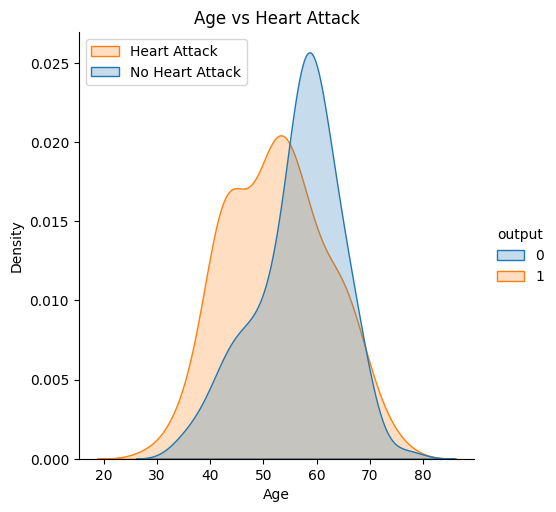

In [67]:
sns.displot(df_heart, x="age", hue="output", kind="kde", fill=True)
plt.title('Age vs Heart Attack')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['Heart Attack', 'No Heart Attack'])
plt.show()

Observation:

Heart Attack (Orange): The orange curve shows that the likelihood of heart attack seems to peak around ages 50 to 60.

No Heart Attack (Blue): The blue curve peaks around ages 55 to 65, indicating that individuals who did not have a heart attack are slightly older on average.

The overlap in the middle shows that there are individuals in their 50s and 60s who are present in both groups, but the No Heart Attack group has a slightly older peak.


Conclusion:
Heart Attack Risk by Age: Younger individuals (around 50-60 years old) are more likely to have a heart attack, while individuals in the higher age range (around 60-70 years) are more likely to not have a heart attack.
The overlap indicates that heart attacks occur across a wide age range, but age is a key factor influencing the likelihood of a heart attack, with younger individuals in this dataset showing a higher risk.

### Heart attack(output) vs Cholestrol(chol)

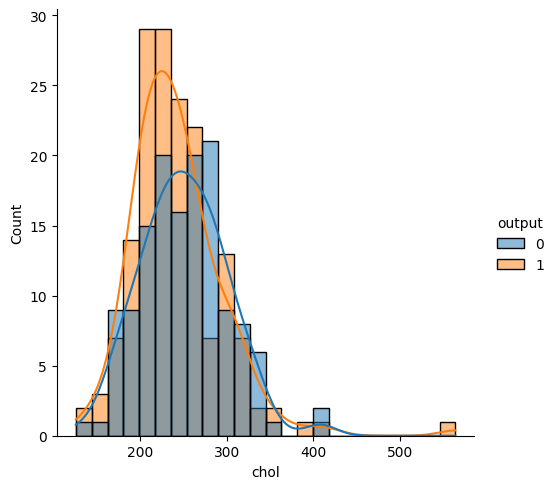

In [68]:
sns.displot(df_heart, x ='chol', hue='output', kde=True)

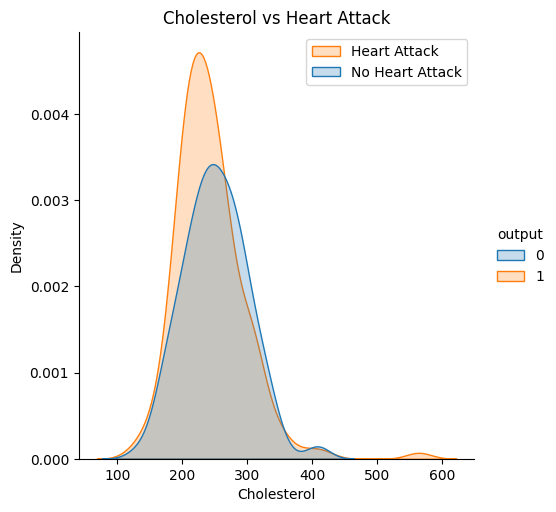

In [69]:
sns.displot(df_heart, x ='chol', hue='output', kind='kde', fill=True)
plt.title('Cholesterol vs Heart Attack')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.legend(['Heart Attack', 'No Heart Attack'])

**Observation:**

- Cholesterol and Heart Attack Risk: Individuals with higher cholesterol (peaking between 230-250) tend to be at a greater risk of having a heart attack. However, since the distribution overlaps, cholesterol alone might not fully determine the likelihood of a heart attack. Other factors may need to be considered in combination with cholesterol levels for better prediction.
- This plot shows that while cholesterol levels are associated with heart attack risk, the association is not perfect due to the overlapping distributions of both groups.

### Heart attack(output) vs resting blood pressure(trtbps)

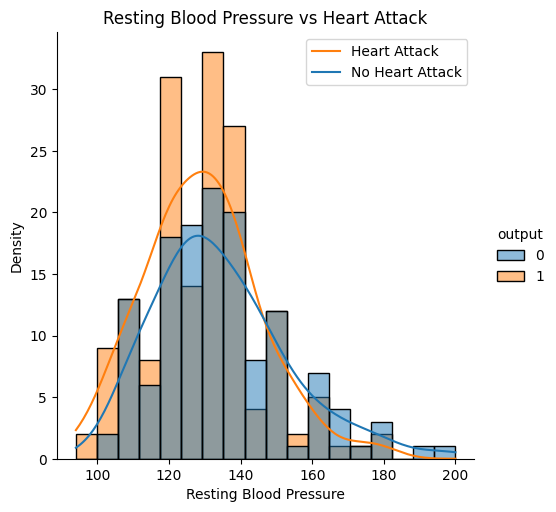

In [70]:
sns.displot(df_heart, x ='trtbps', hue='output', kde=True)
plt.title('Resting Blood Pressure vs Heart Attack')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Density')
plt.legend(['Heart Attack', 'No Heart Attack'])

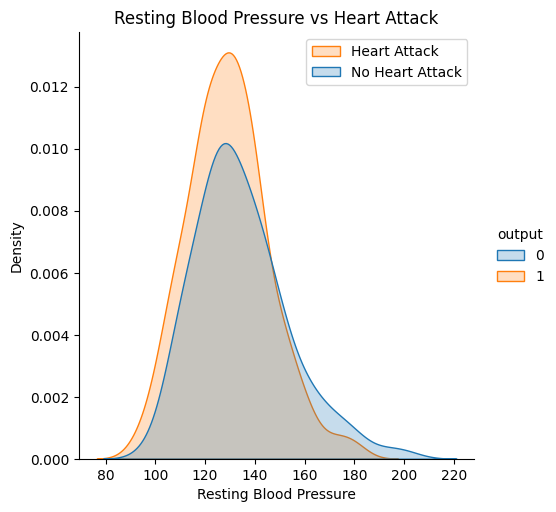

In [71]:
sns.displot(df_heart, x ='trtbps', hue='output', kind='kde', fill=True)
plt.title('Resting Blood Pressure vs Heart Attack')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Density')
plt.legend(['Heart Attack','No Heart Attack'])

**Observation:**
- Resting Blood Pressure and Heart Attack Risk: Both groups have similar resting blood pressure distributions, with peaks around 120-140 mm Hg. There is considerable overlap, indicating that resting blood pressure alone may not be a strong predictor of heart attack risk.
- Additional Factors Needed: Since the distributions are similar, other variables likely need to be considered in conjunction with resting blood pressure to better predict heart attack risk.

### Heart attack(output) vs maximum heart rate achieved(thalach)

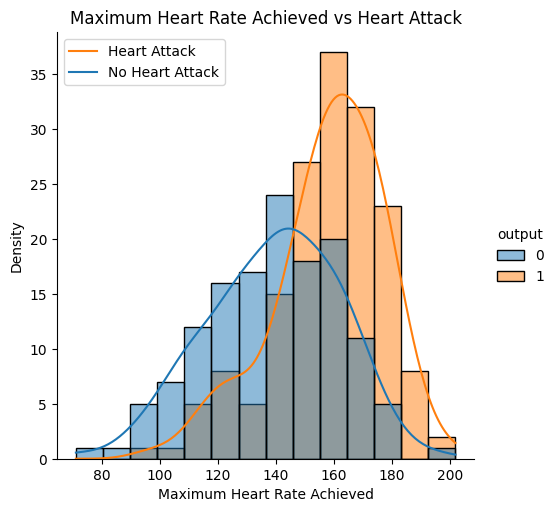

In [72]:
sns.displot(df_heart, x ='thalachh', hue='output', kde=True)
plt.title('Maximum Heart Rate Achieved vs Heart Attack')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Density')
plt.legend(['Heart Attack', 'No Heart Attack'])

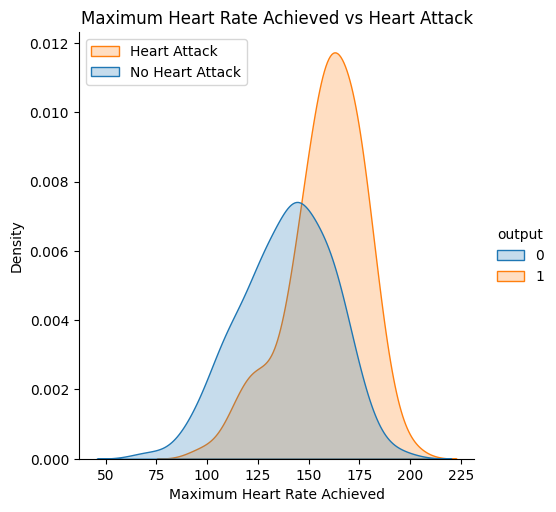

In [73]:
sns.displot(df_heart, x ='thalachh', hue='output', kind='kde', fill=True)
plt.title('Maximum Heart Rate Achieved vs Heart Attack')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Density')
plt.legend(['Heart Attack', 'No Heart Attack'])

**Observation:**

There is a possibility that people having higher heart rate have higher chance of heart attack. But since there is a overlap, this may not always be true.

### Violin plot

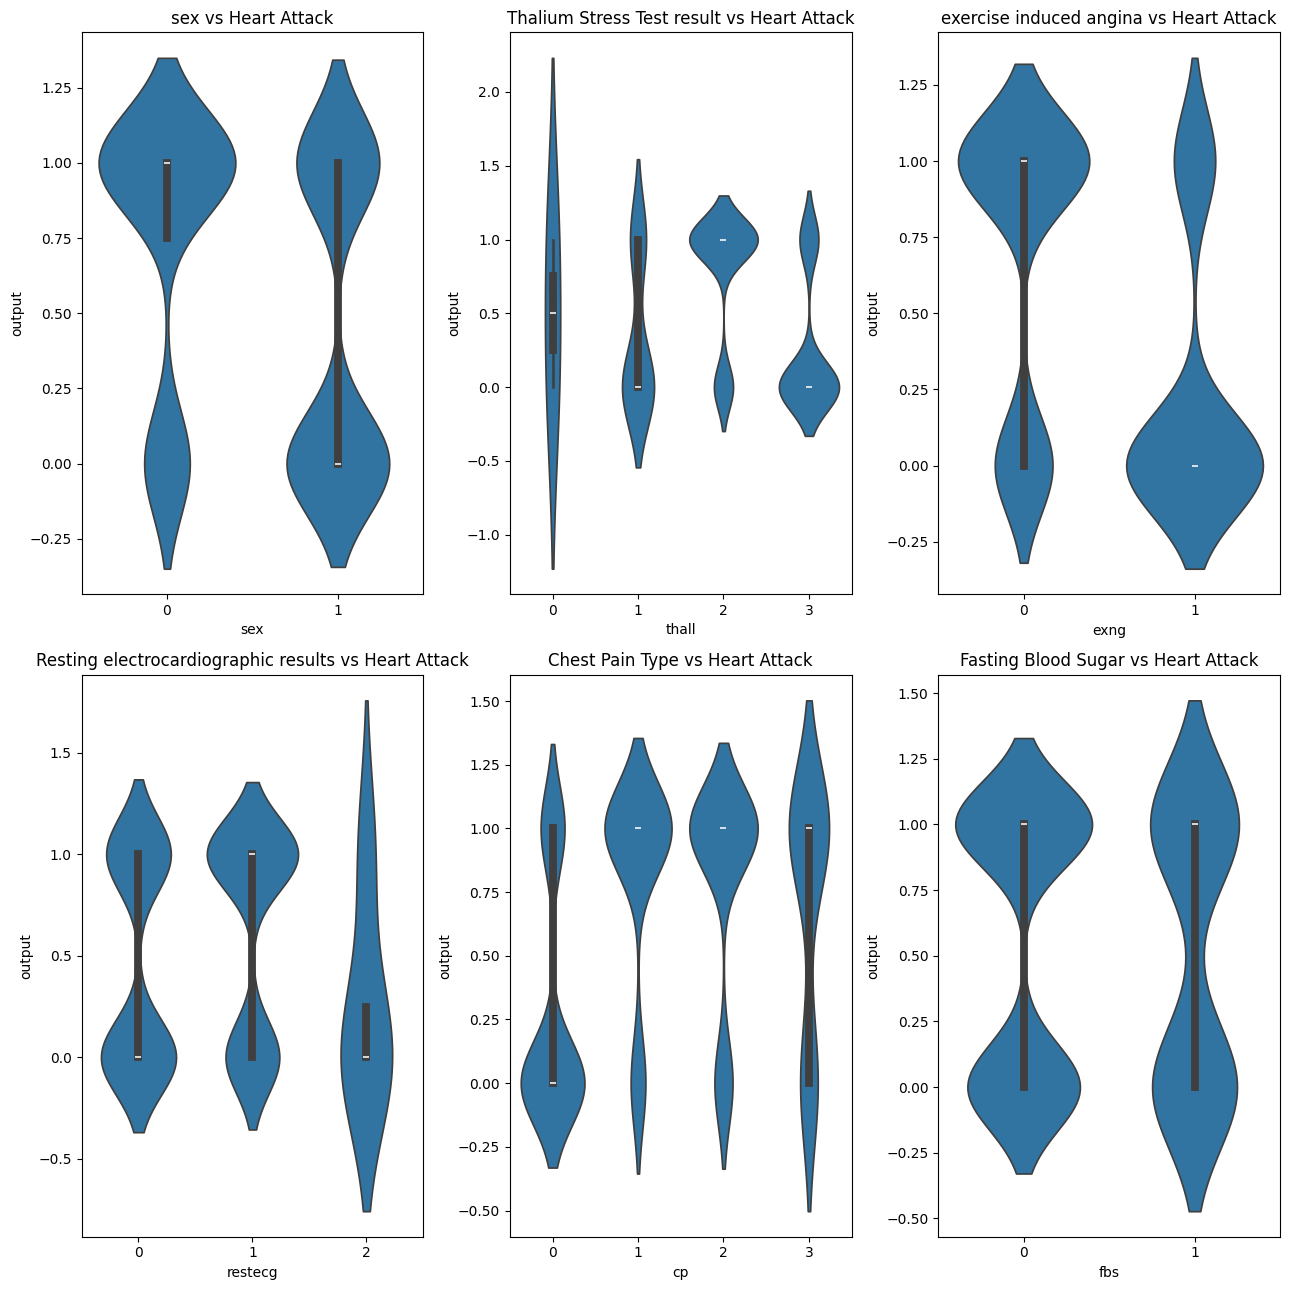

In [74]:
plt.figure(figsize=(13,13))


plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df_heart)
plt.title('sex vs Heart Attack')

plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df_heart)
plt.title('Thalium Stress Test result vs Heart Attack')

plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df_heart)
plt.title('exercise induced angina vs Heart Attack')

plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df_heart)
plt.title('Resting electrocardiographic results vs Heart Attack')

plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df_heart)
plt.title('Chest Pain Type vs Heart Attack')


plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = df_heart)
plt.title('Fasting Blood Sugar vs Heart Attack')

plt.tight_layout()
plt.show()



**Observations:**
    
- *Exercise Induced Angina (Exng), Chest Pain Type (Cp), and Thallium Stress Test (Thall)* results show strong associations with heart attack outcomes, making them potentially strong predictors.
  
- *Sex* indicates that males might have a higher likelihood of heart attack, but it's not a determining factor alone.
  
- *Resting ECG abnormalities*, especially ST-T wave abnormalities, correlate more with heart attack occurrences.
  
- *Fasting Blood Sugar (Fbs)* has a less strong but still visible correlation with heart attack outcomes.

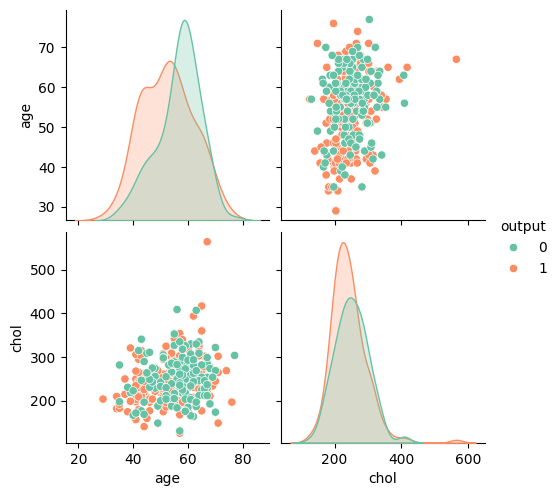

In [81]:
#comparing age, cholesterol, and output
sns.pairplot(df_heart, vars=['age', 'chol'], hue='output', palette='Set2')
plt.show()


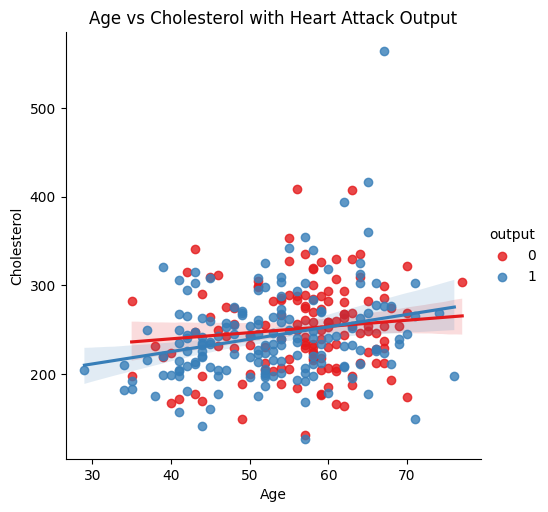

In [77]:
# Regression plot for age vs cholesterol
sns.lmplot(x='age', y='chol', hue='output', data=df_heart, palette='Set1')
plt.title('Age vs Cholesterol with Heart Attack Output')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


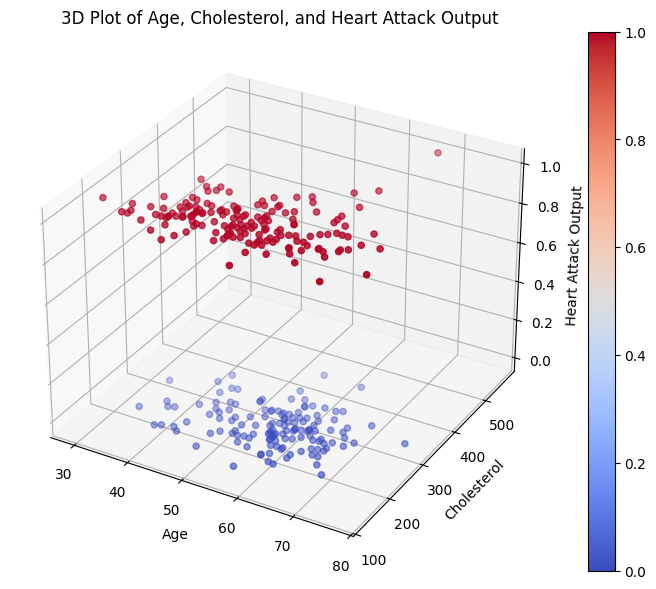

In [76]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot age, cholesterol, and output
sc = ax.scatter(df_heart['age'], df_heart['chol'], df_heart['output'], c=df_heart['output'], cmap='coolwarm')

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Heart Attack Output')

plt.title('3D Plot of Age, Cholesterol, and Heart Attack Output')
plt.colorbar(sc)
plt.show()


#Observation

Proper inferences cannot be drawn from the above three plots.